# 03. Further EDA and preprocessing

# Contents

1. Introduction
2. Defining and exploring our target variable of interest
3. Key Patterns
4. Delving deeper into our feature variables - univariate analysis
5. Delving deeper into our feature variables - multivariate analysis
6. Key Insights
7. Basic statistical analysis
8. Summary
9. Next steps

# 1. Introduction

In this notebook, we will import our merged and cleaned dataset `employed_final_new`, to build on the Exploratory Data Analysis conducted till date. THe focus of this notebook will be on:

* Sharing the updated data dictionary
* Defining and exploring our target variable of interest, relating to job satisfaction
* Delving deeper into features from our newly merged dataset, which contains survey data across survey years: `2015`, `2017`, `2019` and `2021`
* Performing basic feature engineering, as identified
* Refining our hypotheses
* Performing basic statistical analysis, including correlations and measuring statistical significance
* Outlining next steps and modelling roadmap



First, let's import necessary libraries:

In [382]:
# Importing essential libraries
import pandas as pd          
import numpy as np         
import matplotlib.pyplot as plt  
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import os

Importing our merged and cleaned dataset to conduct further EDA:

In [383]:
final_eda = pd.read_csv("/Users/niveditaprasad/Desktop/capstone_template/data_for_EDA/employed_final_new.csv")

Very quick sanity check for any missing values - which were addressed in our previous notebook:

In [384]:
# Check for missing values in each column of employed_final_new
missing_values = final_eda.isna().sum()

# Display columns with missing values
missing_columns = missing_values[missing_values > 0]
print(f"Columns with missing values:\n{missing_columns}")

Columns with missing values:
Series([], dtype: int64)


Reminder of the shape of our dataframe:

In [385]:
print(f"The final_eda DataFrame has {final_eda.shape[0]} rows and {final_eda.shape[1]} columns.")

The final_eda DataFrame has 295323 rows and 31 columns.


And a reminder of the columns present in this dataframe:

In [386]:
final_eda.columns

Index(['job_satisfaction', 'satisfaction_salary', 'satisfaction_advancement',
       'satisfaction_benefits', 'satisfaction_challenges',
       'satisfaction_location', 'satisfaction_security', 'salary',
       'importance_society_contribution', 'job_degree_relation',
       'recent_degree_field', 'recent_degree_type',
       'academic_year_most_recent_degree', 'age', 'age_group',
       'marital_status', 'citizenship_status', 'children_in_household',
       'active_certifications', 'last_worked_month', 'last_worked_year',
       'start_year_current_job', 'survey_year', 'occupation_name', 'female',
       'business_for_profit', 'employer_sector', 'employer_size_category',
       'employer_region', 'respondent_region', 'ethnicity'],
      dtype='object')

In [387]:
final_eda.dtypes

job_satisfaction                      int64
satisfaction_salary                   int64
satisfaction_advancement              int64
satisfaction_benefits                 int64
satisfaction_challenges               int64
satisfaction_location                 int64
satisfaction_security                 int64
salary                              float64
importance_society_contribution       int64
job_degree_relation                   int64
recent_degree_field                  object
recent_degree_type                   object
academic_year_most_recent_degree    float64
age                                 float64
age_group                           float64
marital_status                       object
citizenship_status                   object
children_in_household                object
active_certifications               float64
last_worked_month                   float64
last_worked_year                    float64
start_year_current_job              float64
survey_year                     

Over the course of this notebook, and in preparation for the baseline models, we will deal with these datatypes appropriately as part of preprocessing - ensuring all columns are converted to numeric type.

However to begin with, given that we want to explore any patterns over survey years, let's convert the 'survey_year' variable to a year oobject:

In [388]:
# Convert 'survey_year' to a year object
final_eda['survey_year'] = pd.to_datetime(final_eda['survey_year'], format='%Y')

# 2. Defining and exploring our target variable of interest - the notion of 'Job Satisfaction'

Up until now, the focus of our analysis has been on understanding the notion of a successful job match, thinking about its relation to self-reported job satisfaction.

Given the unique qualities of the US National Survey of College Graduates dataset, which has information on an individual's salary, 'overall' job satisfaction, and different components of job satisfaction, it's worth exploring the data we have to hand and how this varies over survey years.

## (a) Firstly, what can we learn about 'overall' job satisfaction scores, compared to components of job satisfaction?

We can plot data on job satisfaction scores within the dataset - building on what we learnt in Notebook 1, we can now explore proportions of job satisfaction scores across ALL years:

In [389]:
# Import necessary libraries
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Custom Likert scale labels
likert_labels = {
    1: "Very Dissatisfied",
    2: "Somewhat Dissatisfied",
    3: "Somewhat Satisfied",
    4: "Very Satisfied"
}

# Use the Viridis color palette
friendly_colors = px.colors.sequential.Viridis

# List of satisfaction-related columns
jobsat_columns = [
    'job_satisfaction',
    'satisfaction_salary',
    'satisfaction_advancement',
    'satisfaction_benefits',
    'satisfaction_challenges',
    'satisfaction_location',
    'satisfaction_security'
]

# Create subplots
fig = make_subplots(
    rows=4, cols=2, 
    subplot_titles=[
        'Overall Job Satisfaction',
        'Satisfaction with Salary',
        'Satisfaction with Career Advancement',
        'Satisfaction with Benefits',
        'Satisfaction with Intellectual Challenge',
        'Satisfaction with Location',
        'Satisfaction with Job Security'
    ]
)

# Plotting each satisfaction-related column as a bar plot
for i, column in enumerate(jobsat_columns):
    # Count the occurrences of each satisfaction level
    value_counts = final_eda[column].value_counts(normalize=True).sort_index() * 100
    
    # Create bar plot
    fig.add_trace(
        go.Bar(
            x=[likert_labels[val] for val in value_counts.index],  # Replace x-axis with Likert labels
            y=value_counts,
            marker_color=friendly_colors[i % len(friendly_colors)],
            name=column.replace("_", " ").title(),
            texttemplate='%{y:.2f}%',  # Restrict hover text to 2 decimal places
            hoverinfo="text+y"
        ),
        row=(i // 2) + 1, col=(i % 2) + 1
    )
    
    # Update y-axis labels
    fig.update_yaxes(
        title_text='Percentage (%)',  # Set y-axis title to Percentage (%)
        ticksuffix='%',  # Add percentage symbol to y-axis tick labels
        row=(i // 2) + 1, col=(i % 2) + 1
    )

# Update layout for the entire plot, including title
fig.update_layout(
    height=1200,  # Increased height for more space
    width=1200,   # Increased width for more space
    title={
        'text': "Distribution of Satisfaction Ratings Across Various Job Aspects",
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'y': 0.975,
        'font': {
            'family': "Arial, sans-serif",
            'size': 24,  # Increase font size
            'color': 'black',
            'weight': 'bold'
        }
    },
    showlegend=False 
)

# Show the plot
fig.show()


## **Key takeaways**

## 1. What does this tell us about 'overall' job satisfaction, compared to components of job satisfaction?

The charts indicate that overall job satisfaction follows a very similar pattern to each of the specific components of satisfaction, such as satisfaction with salary, career advancement, benefits, and job security. In most cases, the majority of respondents fall into the categories of "Somewhat Satisfied" or "Very Satisfied" across all dimensions. This consistency suggests that while each component of job satisfaction may highlight different aspects of the workplace, they collectively contribute to an individual's overall sense of satisfaction.

## 2. What could this tell us about features to explore?

The charts suggest that each component of job satisfaction could potentially play a critical role in determining overall job satisfaction. For instance:

* Satisfaction with career advancement and salary is quite polarised, with a notable proportion reporting dissatisfaction, especially compared to other dimensions.

* Job security and location show stronger "Very Satisfied" responses compared to others, which may indicate their relative importance. For jobseekers, understanding the security and location of a potential job could be critical factors in achieving long-term satisfaction. Policy makers could focus on initiatives that promote workplace stability, such as job security programs or flexible working arrangements, to maintain high levels of satisfaction in these areas.

* Intellectual challenge and benefits tend to have more balanced distributions between "Somewhat Satisfied" and "Very Satisfied," where focused improvements might significantly impact overall satisfaction. For jobseekers, this means looking beyond immediate perks or salary and considering growth potential in a job. For policy makers, addressing perceived stagnation in these areas—perhaps through career development programs or incentive structures—could lead to significant improvements in workforce satisfaction and retention.

## 3. Based on the above, how might we define our target variable for 'job satisfaction'?

Given the general alignment in the patterns, it makes sense to focus on 'overall job satisfaction' as the primary target variable for predicting successful job matches. Since this variable encapsulates satisfaction across multiple dimensions, it provides a holistic measure of job satisfaction.

Given the majority of responses relating to 'Overall' job satisfaction around "Somewhat Satisfied" and "Very Satisfied," we can define our target variable as a binary outcome: "Satisfied" vs. "Not Satisfied." 

For instance, we can group "Somewhat Satisfied" and "Very Satisfied" responses into a "High Job Satisfaction" category, while responses of "Very Dissatisfied" and "Somewhat Dissatisfied" would fall under "Low Job Satisfaction."

We can notice that there's a high class imbalance here, ~90% would fall under highly satisfied with their job, compared to 10% who are dissatisfied with their job. We will have to keep this in mind as we finetune our models moving forward, and for classification tasks:

It worth exploring how the same plot above varies by survey year:

# (b) How do job satisfaction scores vary over time?

## (Adjust the year slider at the bottom of the plot to view scores for each survey year)

In [390]:
# Import necessary libraries
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Custom Likert scale labels
likert_labels = {
    1: "Very Dissatisfied",
    2: "Somewhat Dissatisfied",
    3: "Somewhat Satisfied",
    4: "Very Satisfied"
}

# Use the Viridis color palette
friendly_colors = px.colors.sequential.Viridis

# List of satisfaction-related columns
jobsat_columns = [
    'job_satisfaction',
    'satisfaction_salary',
    'satisfaction_advancement',
    'satisfaction_benefits',
    'satisfaction_challenges',
    'satisfaction_location',
    'satisfaction_security'
]

# Create subplots
fig = make_subplots(
    rows=4, cols=2, 
    subplot_titles=[
        'Overall Job Satisfaction',
        'Satisfaction with Salary',
        'Satisfaction with Career Advancement',
        'Satisfaction with Benefits',
        'Satisfaction with Intellectual Challenge',
        'Satisfaction with Location',
        'Satisfaction with Job Security'
    ]
)

# Get the unique years from the survey_year column
years = sorted(final_eda['survey_year'].dt.year.unique())

# Create a list to store frames for animation
frames = []

# Loop through satisfaction-related columns and plot for each year
for year in years:
    frame_data = []
    for i, column in enumerate(jobsat_columns):
        # Filter data for the current year
        filtered_data = final_eda[final_eda['survey_year'].dt.year == year]
        
        # Count the occurrences of each satisfaction level WITHIN this year
        value_counts = filtered_data[column].value_counts(normalize=True).sort_index() * 100
        
        # Create bar trace for the year and column
        trace = go.Bar(
            x=[likert_labels[val] for val in value_counts.index],  # Replace x-axis with Likert labels
            y=value_counts,
            marker_color=friendly_colors[i % len(friendly_colors)],
            name=f"{column.replace('_', ' ').title()} ({year})",
            texttemplate='%{y:.2f}%',  # Restrict hover text to 2 decimal places
            hoverinfo="text+y"
        )
        frame_data.append(trace)

    # Create a frame for each year
    frames.append(go.Frame(data=frame_data, name=str(year)))

# Add traces for the initial frame (first year)
for i, column in enumerate(jobsat_columns):
    filtered_data = final_eda[final_eda['survey_year'].dt.year == years[0]]
    value_counts = filtered_data[column].value_counts(normalize=True).sort_index() * 100
    
    fig.add_trace(
        go.Bar(
            x=[likert_labels[val] for val in value_counts.index],
            y=value_counts,
            marker_color=friendly_colors[i % len(friendly_colors)],
            name=column.replace("_", " ").title(),
            texttemplate='%{y:.2f}%',
            hoverinfo="text+y"
        ),
        row=(i // 2) + 1, col=(i % 2) + 1
    )

    # Update y-axis labels (no x-axis label)
    fig.update_yaxes(
        title_text='Percentage (%)',  
        ticksuffix='%',
        row=(i // 2) + 1, col=(i % 2) + 1
    )

# Add the slider and animation settings
fig.update_layout(
    sliders=[{
        'steps': [{'label': str(year), 'method': 'animate', 'args': [[str(year)], {'mode': 'immediate', 'frame': {'duration': 1000, 'redraw': True}}]} for year in years],
        'currentvalue': {'prefix': 'Year: ', 'font': {'size': 20}},
        'pad': {'t': 50}
    }],
    updatemenus=[{
        'type': 'buttons',
        'showactive': False,
        'x': 0.1,
        'y': 1.15,
        'xanchor': 'right',
        'yanchor': 'top',
        'buttons': [{
            'label': 'Play',
            'method': 'animate',
            'args': [None, {'frame': {'duration': 1000, 'redraw': True}, 'fromcurrent': True, 'transition': {'duration': 300}}]
        }, {
            'label': 'Pause',
            'method': 'animate',
            'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate', 'transition': {'duration': 0}}]
        }]
    }],
    height=1200,
    width=1200,
    title={
        'text': "Distribution of Satisfaction Ratings Across Various Job Aspects by Year",
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'y': 0.95,
        'font': {
            'family': "Arial, sans-serif",
            'size': 24,
            'color': 'black',
            'weight': 'bold'
        }
    },
    showlegend=False
)

# Add the frames to the figure
fig.frames = frames

# Show the plot
fig.show()


# Key Patterns:

## 1. Overall Job Satisfaction:

* The Overall Job Satisfaction scores seem to show a relatively steady pattern over time, with minor fluctuations between the levels of satisfaction. The majority of respondents tend to fall within the "Somewhat Satisfied" and "Very Satisfied" categories, with lower percentages in the "Very Dissatisfied" or "Somewhat Dissatisfied" categories. 
* However, we can note the lowest 'Very satisfied' proprtions during 2021, post pandemic.

## 2. Satisfaction with Salary:

There is more variation in satisfaction with salary compared to overall job satisfaction. We observe a relatively larger portion of respondents reporting dissatisfaction (either "Somewhat Dissatisfied" or "Very Dissatisfied") in some years, indicating that salary is a more fluctuating factor in job satisfaction.


## 3. Satisfaction with Career Advancement:

Similar to salary, satisfaction with career advancement sees a bit more movement across the years, with a notable number of respondents falling into the "Somewhat Dissatisfied" category. 

## 4. Satisfaction with Benefits:

Satisfaction with benefits also varies somewhat but tends to follow the trend of having more respondents in the "Somewhat Satisfied" and "Very Satisfied" categories.

## 5. Satisfaction with Intellectual Challenge:

Scores for satisfaction with intellectual challenge are typically positive, indicating a steady sense of fulfillment in this area over the years.
Satisfaction with Location:

## 6. Satisfaction with location remains relatively stable, with the majority of respondents satisfied or somewhat satisfied with their job location.

Interesting the % of respondents for 'Very satisfied' is highest during 2021 - potentially a nod to the advent of work-from-home vs office working post-pandemic.

## 7. Satisfaction with job security

Steady rise in job security across survey years with proportions responding 'Very Satisfied' increasing an dreaching its highest to 55% in 2021 (interesting to note, given post-Covid). This suggests people valued this perhaps even more during this time period of the pandemic.




We've now gotten to know our target variable `Job satisfaction`, but we will come back to this at th end of the notebook to ensure we've defined and coded our target variable appropriately - i.e.,g in line with the above, considering a binary variable of 'Satisfied' vs 'Not Satisfied'.

Before this, we'll build more on our Sprint 1 exploratory data analysis to get to know data across survey years a better:

# 3. Delving deeper into our feature variables - univariate analysis

## (a) To begin with, who were our survey respondents across all survey years?

In [391]:
final_eda['marital_status']

0                                      Married
1                                      Married
2                                      Married
3                                Never married
4                                Never married
                          ...                 
295318                                 Married
295319                                 Married
295320                           Never married
295321    Living in marriage-like relationship
295322                           Never married
Name: marital_status, Length: 295323, dtype: object

Our dataset is rich in information relating to key demographics, such as:

* Whether the respondent was male or `Female`
* The respondent's `Age`...
* `marital_status`
* `ethnicity`

Let's understand the proportions of these individuals in each of our survey years:

For the binary variable, `female` (1 means respondent was female, 0 means they were male):

In [392]:
final_eda['female'].isna().sum()

np.int64(0)

In [393]:
import pandas as pd
import plotly.express as px

# Ensure 'female' column is integer type
final_eda['female'] = final_eda['female'].astype(int)

# Calculate normalized value counts for 'female' column within each 'survey_year'
normalized_counts = final_eda.groupby('survey_year')['female'].value_counts(normalize=True).mul(100).round(2).rename('proportion').reset_index()

# Extract the year from the 'survey_year' column for plotting purposes (but keep original as datetime)
normalized_counts['Survey Year'] = normalized_counts['survey_year'].dt.year

# Map gender labels
gender_labels = {1: 'Female', 0: 'Male'}
normalized_counts['female_label'] = normalized_counts['female'].map(gender_labels)

# Create the interactive plot using Plotly Express
fig = px.bar(
    normalized_counts, 
    x='female_label', 
    y='proportion', 
    color='female_label', 
    facet_col='Survey Year', 
    facet_col_wrap=2, 
    category_orders={'female_label': ['Male', 'Female']},  # Ensure consistent order of categories
    labels={'female_label': 'Gender', 'proportion': 'Proportion (%)'},
    title="Gender Proportions by Survey Year",
    color_discrete_sequence=px.colors.sequential.Viridis  # Apply the Viridis color scheme

)

# Update layout for a cleaner appearance
fig.update_layout(
    height=600,
    width=1000,
    showlegend=False
)


# Show x-axis labels for all subplots
fig.update_xaxes(showticklabels=True)

# Show the interactive plot
fig.show()


It looks like the gender proportions of survey respondents remains stable across our chosen survey years. This is helpful to understand that the overall proprtion of female vs male respondents is a reasonable representation of within-year proportions.

For `marital_status`:

In [394]:
# Multiply normalized proportions by 100 for percentage
normalized_counts_marital = final_eda.groupby('survey_year')['marital_status'].value_counts(normalize=True).mul(100).round(3).rename('proportion').reset_index()

# Extract the year from the 'survey_year' column for plotting purposes (but keep original as datetime)
normalized_counts_marital['Survey Year'] = normalized_counts_marital['survey_year'].dt.year

# Create the interactive plot with a consistent color
fig_marital = px.bar(
    normalized_counts_marital, 
    x='marital_status', 
    y='proportion', 
    facet_col='Survey Year', 
    facet_col_wrap=2, 
    labels={'marital_status': 'Marital Status', 'proportion': 'Percentage'},
    title="Marital Status Proportions by Survey Year",
    color_discrete_sequence=["#440154"],  # Use the specific purple color here
    facet_row_spacing=0.2  # Increase space between facet rows (adjust this value as needed)

)

# Increase overall plot height and rotate x-axis labels
fig_marital.update_layout(
    height=1000,  # Further increase height for spacing
    margin=dict(t=60),  # Add top margin to avoid cutting off title
    title_x=0.5  # Center the title
)


# Show x-axis labels for all subplots
fig_marital.update_xaxes(showticklabels=True)

# Show the interactive plot
fig_marital.show()


Once again, relatively stable proportions of our survey respondents over time, with the majority of respondents either married or never married.

For `ethnicity`:

In [395]:
# Multiply normalized proportions by 100 for percentage
normalized_counts_ethnicity = final_eda.groupby('survey_year')['ethnicity'].value_counts(normalize=True).mul(100).round(3).rename('proportion').reset_index()

# Extract the year from the 'survey_year' column for plotting purposes (but keep original as datetime)
normalized_counts_ethnicity['Survey Year'] = normalized_counts_ethnicity['survey_year'].dt.year

# Create the interactive plot with a consistent color
fig_ethnicity = px.bar(
    normalized_counts_ethnicity, 
    x='ethnicity', 
    y='proportion', 
    facet_col='Survey Year', 
    facet_col_wrap=2, 
    labels={'ethnicity': 'Ethnicity', 'proportion': 'Proportion (%)'},
    title="Ethnicity Proportions by Survey Year",
    color_discrete_sequence=["#31688E"],  # A blueish tone from Viridis scale
    facet_row_spacing=0.2  # Increase space between facet rows (adjust this value as needed)

)

# Find the maximum value of 'proportion' to set y-axis limits
max_value = normalized_counts_marital['proportion'].max()

# Round the maximum value to the next step (e.g., nearest 10)
max_tick = np.ceil(max_value / 10) * 10  # You can change to 5, etc., for finer control

# Update layout for a cleaner appearance
fig_ethnicity.update_layout(
    height=600,
    width=1000,
    showlegend=False
)


# Show x-axis labels for all subplots
fig_ethnicity.update_xaxes(showticklabels=True)


# Show the interactive plot
fig_ethnicity.show()


Again, proportions of ethnicities remain relatively stable over survey years. It looks like the majority of our respondents are from a white background - second is respondents from an asian background, and third respondents from a black background suggesting underrepresentation in the underlying survey data.

**Since this is college graduate data, we're very much interested in the degree fields and degree types individuals pursued:**

# (b) What were the most popular degree subjects studied - and did this change much over time?

We've got a lot of granular data on `recent_degree_field`, so let's hone in on the top 10 degree fields studied within each survey year, to see how this changes over time. Noting that this variable asks respondents what their most recent degree field was:

In [396]:
# Initialize an empty DataFrame to store results
top_10_degrees = pd.DataFrame()

# Loop over each survey year to get the top 10 degree fields within that year
for year, group in final_eda.groupby('survey_year'):
    top_10 = (group['recent_degree_field']
              .value_counts(normalize=True)
              .mul(100)
              .nlargest(10)  # Get the top 10 within this year
              .reset_index(name='percentage'))
    top_10['survey_year'] = year  # Add the year column
    top_10['Survey Year'] = top_10['survey_year'].dt.year  # Extract the year as an integer
    top_10_degrees = pd.concat([top_10_degrees, top_10])  # Concatenate with the final DataFrame

# Rename columns for clarity
top_10_degrees.rename(columns={'index': 'recent_degree_field'}, inplace=True)

# Create the interactive plot for 'recent_degree_field'
fig_degrees = px.bar(
    top_10_degrees, 
    x='recent_degree_field', 
    y='percentage',  
    facet_col='Survey Year',  
    facet_col_wrap=2, 
    labels={'recent_degree_field': 'Degree Field', 'percentage': 'Proportion of respondents (%)'},
    title="Top 10 Degree Fields Studied by Survey Year",
    # color_discrete_sequence=["#5e3c99"],  # Set default color
    facet_row_spacing=0.4
)

# Update overall plot height and rotate x-axis labels
fig_degrees.update_layout(
    height=1200,  
    margin=dict(t=60),  
    title_x=0.5
)

# Rotate x-axis labels for all subplots to make them more readable
fig_degrees.update_xaxes(tickangle=45, showticklabels=True)

# Apply different colors manually
# colors = ["#1f4e79", "#0077b6", "#00b4d8", "#90e0ef", "#023e8a"]  # Custom blue shades
for i, trace in enumerate(fig_degrees.data):
    fig_degrees.data[i].marker.color = friendly_colors[i % len(friendly_colors)]  # Assign colors based on index

# Show the interactive plot
fig_degrees.show()


The top 10 degree fields remain stable over the 4 survey years. We can notice that as move towards 2021, popularity in electornic and mechanical engineering increases. Some degrees, such as nursing reduce in popularity with 3.1% of respondents doing a nursing degree in 2015, compared to 2.6% of respondents in 2021. This potentially interetsing to note, given the likely impact of the pandemic on the popularity of some degrees.

This was more about what respondents studied in the past - what employment indsutry did they go on to work in?

# (c) Overall, which sectors do our survey respondents work in?

In [397]:
# Calculate normalized value counts for 'employer_sector' column
employer_sector_counts = final_eda['employer_sector'].value_counts(normalize=True).mul(100).reset_index()
employer_sector_counts.columns = ['employer_sector', 'percentage']

# Create the bar plot using Plotly
fig_employer_sector = px.bar(
    employer_sector_counts,
    x='employer_sector',
    y='percentage',
    labels={'employer_sector': 'Employer Sector', 'percentage': 'Percentage (%)'},
    title="What proportion of our survey respondents work in business/industry, versus other sectors?",
    color_discrete_sequence=["#440154"],
)

# Update layout for aesthetics
fig_employer_sector.update_layout(
    height=600,
    width=1000,
    showlegend=False
)

# Show the plot
fig_employer_sector.show()

It appears that around 70% of survey respondents, across all 4 years of survey data work in business / industry, with still a sizeable proportion working within educational institutions.

# (d) What were the top 10 occupations of our survey respondents - and how did this change over time?

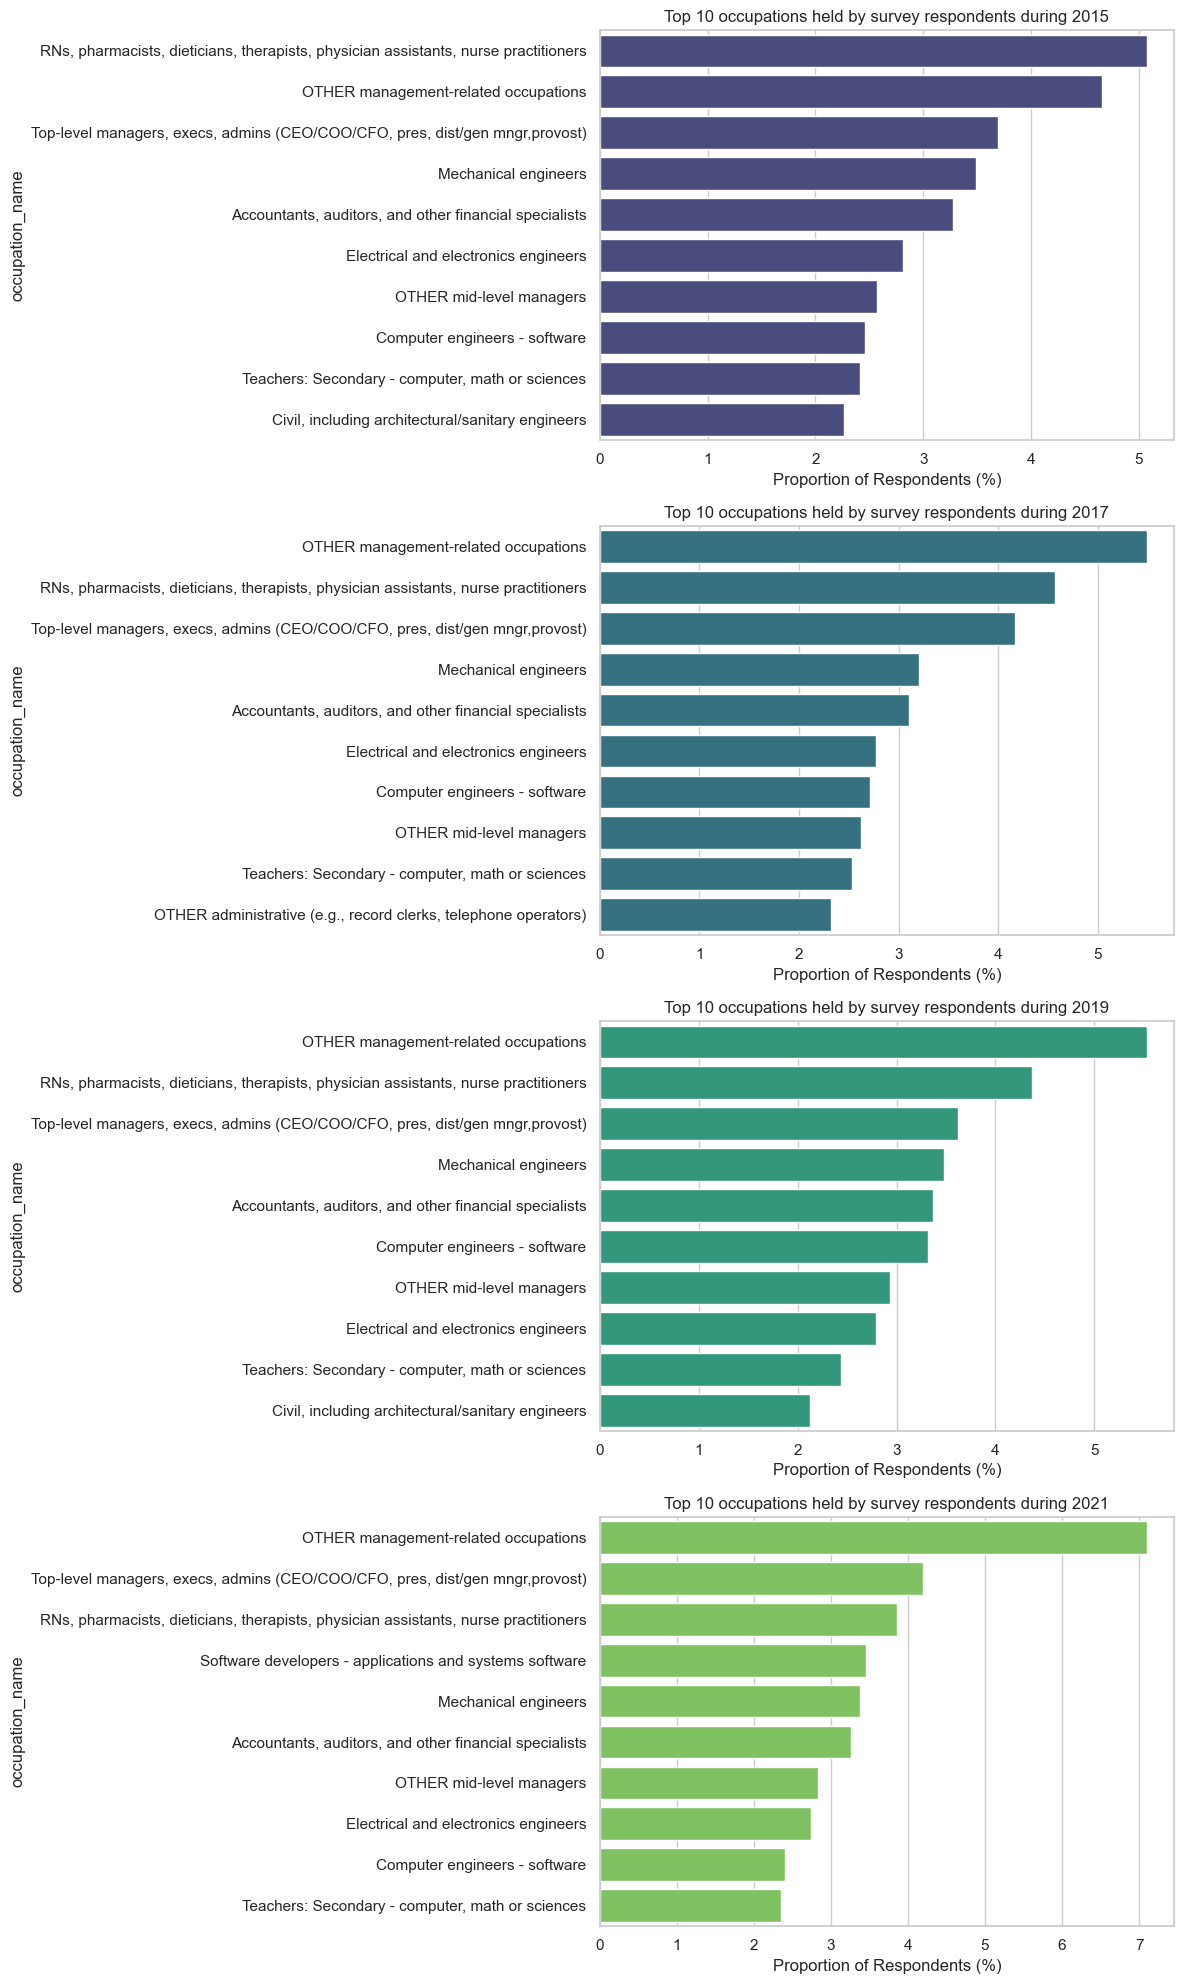

In [398]:
# Calculate normalized value counts for 'occupation_name' within each 'survey_year'
top_10_occupations = (
    final_eda.groupby('survey_year')['occupation_name']
    .value_counts(normalize=True)
    .mul(100)  # Convert to percentages
    .groupby(level=0, group_keys=False)  # Group by survey_year level and apply nlargest
    .nlargest(10)  # Keep only top 10 occupations for each year
    .reset_index(name='percentage')
)

# Extract the year for plotting purposes
top_10_occupations['Survey Year'] = top_10_occupations['survey_year'].dt.year

# Sort by percentage in descending order within each year
top_10_occupations = top_10_occupations.sort_values(by=['Survey Year', 'percentage'], ascending=[True, False])

# Create a grid of subplots with one plot per row
unique_years = top_10_occupations['Survey Year'].unique()
num_years = len(unique_years)

# Set up the figure with subplots, one per row
fig, axes = plt.subplots(nrows=num_years, ncols=1, figsize=(12, 5 * num_years))  # Adjust based on the number of years
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Create a color palette for the years
palette = sns.color_palette("viridis", num_years)

# Loop through each year and create a horizontal bar plot with a unique color for each year
for i, year in enumerate(unique_years):
    ax = axes[i]
    # Filter the data for the current year
    data_year = top_10_occupations[top_10_occupations['Survey Year'] == year].sort_values(by='percentage', ascending=False)
    
    # Convert 'occupation_name' to categorical and set its order to be based on 'percentage'
    data_year['occupation_name'] = data_year['occupation_name'].astype('category')
    data_year['occupation_name'] = data_year['occupation_name'].cat.set_categories(data_year['occupation_name'], ordered=True)
    
    # Create horizontal bar plot, ensuring descending order
    sns.barplot(
        data=data_year, 
        y='occupation_name', 
        x='percentage', 
        ax=ax, 
        color=palette[i],  # Assign a different color for each year
        orient='h',
        order=data_year['occupation_name']  # Explicitly set the order of occupations by percentage
    )
    
    # Set title and labels
    ax.set_title(f"Top 10 occupations held by survey respondents during {year}")
    ax.set_xlabel("Proportion of Respondents (%)")
    
# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# Key takeaways:

1. Growth in Software Roles:

Software developers emerge strongly in 2021, which contrasts with previous years where they were absent. This highlights a recent rise in tech roles.

2. Consistent Presence of Management and Healthcare:

* Management-related occupations (including "OTHER management-related" roles) consistently rank high across all years, indicating strong demand. These could encompass various leadership roles, potentially including project management.

* Healthcare roles (e.g., RNs, pharmacists, therapists) also remain prominent, reflecting ongoing demand in this sector.

3. Engineering Occupations:

* Engineering roles, particularly mechanical and electrical engineers, are consistently present, showcasing stable demand for technical expertise.

4. Teaching as an occupation declining in popularity

* Teachers (secondary, computer/math/science) consistently appear but rank lower, typically at the bottom of the top 10 list.

5. Shifts in Administrative and Civil Engineering Roles:

* Administrative roles briefly enter the top 10 in 2017, while civil engineers are prominent in 2015 but drop out in later years, indicating fluctuating demand for these roles.


It may be noted that the pandemic likely shaped job roles in 2021, with a shift toward tech and project management, while the healthcare sector remained strong. It's worth noting that here given the question posed to respondents about their "principal job" - may mask the full picture of workforce dynamics, particularly for those engaged in secondary roles or gig work during the pandemic.

We've now explored key variables individually. What about delving deeper into the relationships between them?

# 4. Delving deeper into our feature variables - multivariate analysis

## (a) Let's begin with a pairplot to get to know the links between our variables better:

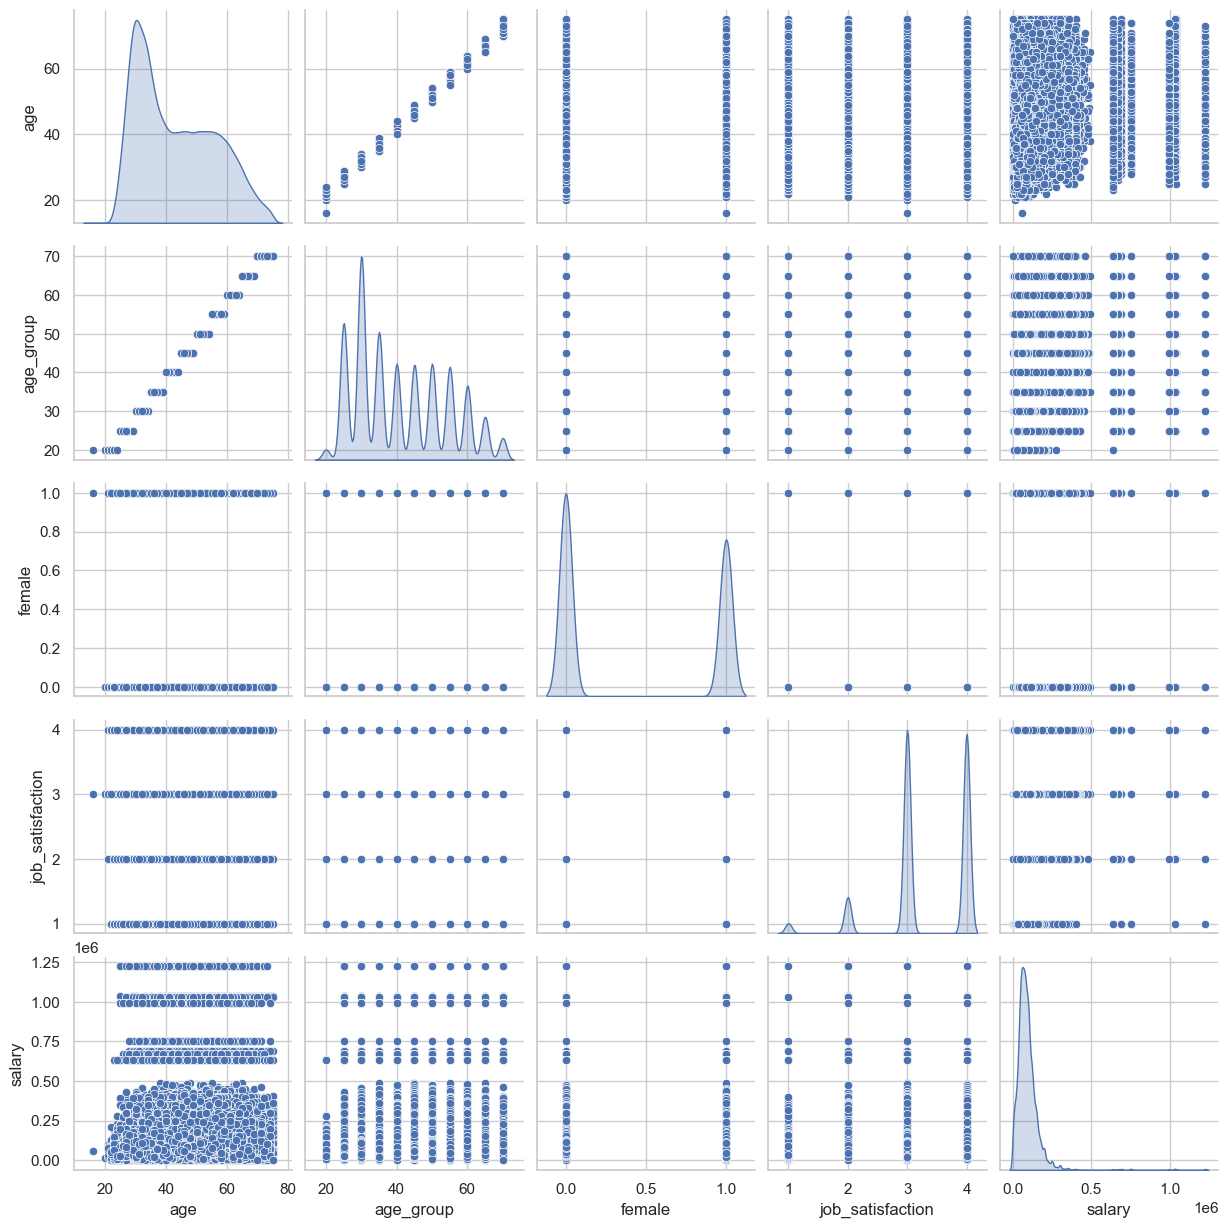

In [399]:
# List of selected variables including 'age', 'age_group', and 'survey_year'
variables_of_interest = ['age', 'age_group', 'female', 'marital_status', 'job_satisfaction', 
                         'ethnicity', 'salary', 'survey_year']

# Creating the pairplot using the selected variables
sns.pairplot(final_eda[variables_of_interest], diag_kind='kde')
plt.show()

# Key insights from this pairplot:

1. Relationship Between Age and Salary:

* There is a positive relationship between age and salary—older individuals tend to have higher salaries, although the distribution flattens out for higher age ranges.
* The distribution of salaries is right-skewed, with most respondents earning under a certain threshold and only a few outliers with very high salaries.

2. Age vs Age Group:

* As expected, age and age_group show a perfect alignment, as age groups are based on age categories. This is visible in the diagonal relationship between these variables.

**This suggests we can likely drop the 'age_group' variable as it's age ca capture what we need to explore sufficiently.**

3. Gender (Female) and Salary:

* The scatter plots do not reveal a strong visible pattern between gender (female) and salary, suggesting further exploration (such as categorical comparisons or statistical testing) may be needed to understand gender-related salary differences.

4. Job Satisfaction Distribution:

* Job satisfaction is distributed primarily around two clusters: very satisfied and somewhat satisfied. There's less representation in the dissatisfied categories, indicating most respondents are generally content with their jobs.
* For respondents with extremely high salaries (outliers in the salary distribution), job satisfaction does not show any consistent pattern—some are highly satisfied, while others are not, further indicating that salary alone may not be a reliable predictor of job satisfaction.

**This suggests that as our target variable, we can code this as a binary variable indicating high satisfaction vs low satisfaction**



Building on these insights, let's make the two changes identified above:

In [400]:
# Step 1: Drop the 'age_group' variable 
final_eda.drop('age_group', axis=1, inplace=True)

# Step 2: Check value counts for 'job_satisfaction' before recoding
print("Job Satisfaction (Before Recoding):")
print(final_eda['job_satisfaction'].value_counts())

# Step 3: Recoding 'job_satisfaction' to a binary target variable
# We'll code 3 and 4 (Somewhat satisfied/Very satisfied) as 1 (high satisfaction), and everything else as 0 (not highly satisfied)

final_eda['high_jobsat'] = final_eda['job_satisfaction'].apply(lambda x: 1 if x in [3, 4] else 0)

# Step 4: Check value counts for 'job_satisfaction_binary' after recoding
print("\nJob Satisfaction (After Recoding to Binary):")
print(final_eda['high_jobsat'].value_counts())

Job Satisfaction (Before Recoding):
job_satisfaction
3    133735
4    131258
2     23802
1      6528
Name: count, dtype: int64

Job Satisfaction (After Recoding to Binary):
high_jobsat
1    264993
0     30330
Name: count, dtype: int64


And now we can drop our original job satisfication column, since we've recoded to our new binary variable:

In [401]:
final_eda.columns

Index(['job_satisfaction', 'satisfaction_salary', 'satisfaction_advancement',
       'satisfaction_benefits', 'satisfaction_challenges',
       'satisfaction_location', 'satisfaction_security', 'salary',
       'importance_society_contribution', 'job_degree_relation',
       'recent_degree_field', 'recent_degree_type',
       'academic_year_most_recent_degree', 'age', 'marital_status',
       'citizenship_status', 'children_in_household', 'active_certifications',
       'last_worked_month', 'last_worked_year', 'start_year_current_job',
       'survey_year', 'occupation_name', 'female', 'business_for_profit',
       'employer_sector', 'employer_size_category', 'employer_region',
       'respondent_region', 'ethnicity', 'high_jobsat'],
      dtype='object')

## (b) Let's proceed to investigate relationships within our dataset:

**Firstly, how is salary distributed across our dataset?**

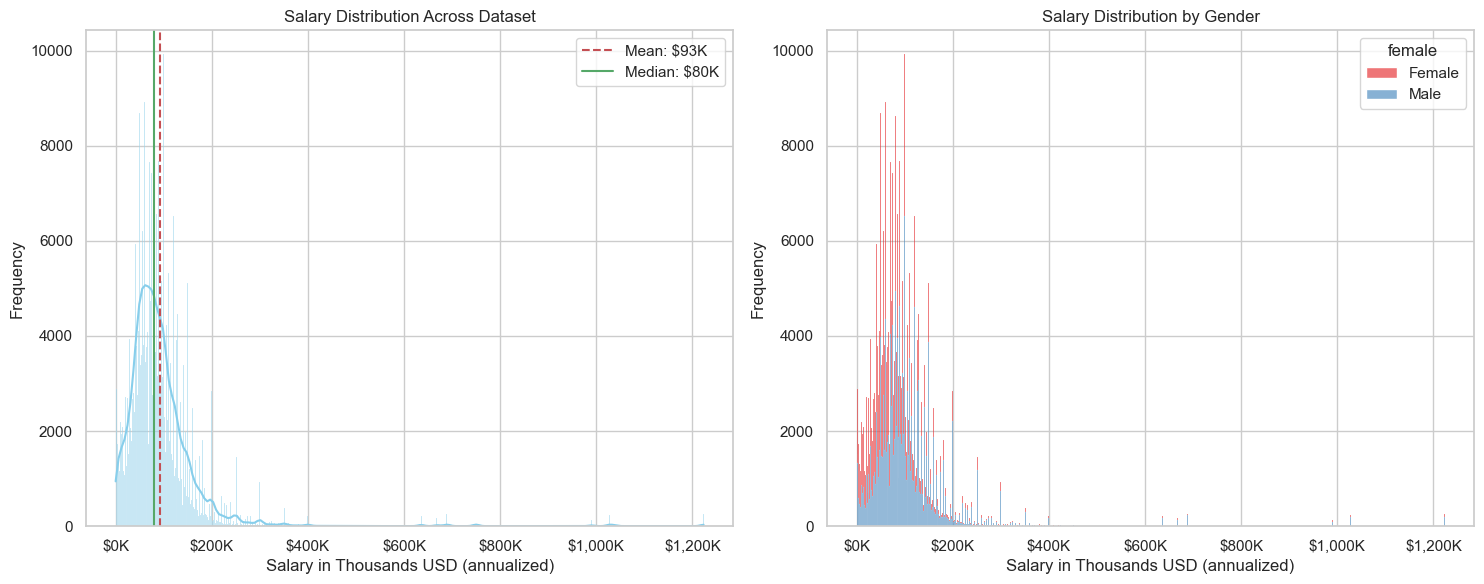

In [402]:
import matplotlib.ticker as mtick  # Import mtick for formatting

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1 - Salary distribution (with mean and median lines)
sns.histplot(final_eda['salary'] / 1000, kde=True, ax=axs[0], color='skyblue')  # Scale salary to thousands
mean_salary = final_eda['salary'].mean() / 1000
median_salary = final_eda['salary'].median() / 1000
axs[0].axvline(mean_salary, color='r', linestyle='--', label=f'Mean: ${mean_salary:,.0f}K')
axs[0].axvline(median_salary, color='g', linestyle='-', label=f'Median: ${median_salary:,.0f}K')
axs[0].set_title('Salary Distribution Across Dataset')
axs[0].set_xlabel('Salary in Thousands USD (annualized)')
axs[0].set_ylabel('Frequency')
axs[0].legend()

# Salary distribution by gender (temporary labels for the plot)
sns.histplot(
    data=final_eda, 
    x=final_eda['salary'] / 1000,  # Scale salary to thousands
    hue=final_eda['female'].map({0: 'Male', 1: 'Female'}),  # Map gender values for the plot
    multiple='stack', 
    ax=axs[1], 
    palette='Set1', 
    alpha=0.6
)
axs[1].set_title('Salary Distribution by Gender')
axs[1].set_xlabel('Salary in Thousands USD (annualized)')
axs[1].set_ylabel('Frequency')

# Adjust the x-axis formatting for both subplots
for ax in axs:
    ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.0f}K'))

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


#  Summary of the Salary Distribution Plots:

1. Right-Skewed Salary Distribution:

* The overall salary distribution is highly right-skewed, with the majority of respondents earning salaries below $200K, and a small number of high-salary outliers stretching the distribution beyond $200K to $1.2M.

2. Mean and Median Salaries:

* The mean salary is approximately $93K (red dashed line), while the median salary is lower at around $80K (green solid line). This gap between the mean and median highlights the influence of high-salary outliers on the mean, pulling it upward.

3. Gender Differences in Salary:

* The second plot shows the salary distribution by gender. The majority of females (red) are clustered in the lower salary range, aligning with the overall majority salary distribution.
* In contrast, males (blue) are more spread out, and they dominate the higher salary ranges, with more blue-colored outliers visible at higher salary levels.

**How does salary vary by individuals 'highly satisfied' with their job, versus those who aren't?**

We can also explore any differences depending on whether the individual is female.

/var/folders/d8/f47z80nj3835j2cjhqsrtc6r0000gn/T/ipykernel_71592/1377861893.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/d8/f47z80nj3835j2cjhqsrtc6r0000gn/T/ipykernel_71592/1377861893.py:16: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/var/folders/d8/f47z80nj3835j2cjhqsrtc6r0000gn/T/ipykernel_71592/1377861893.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




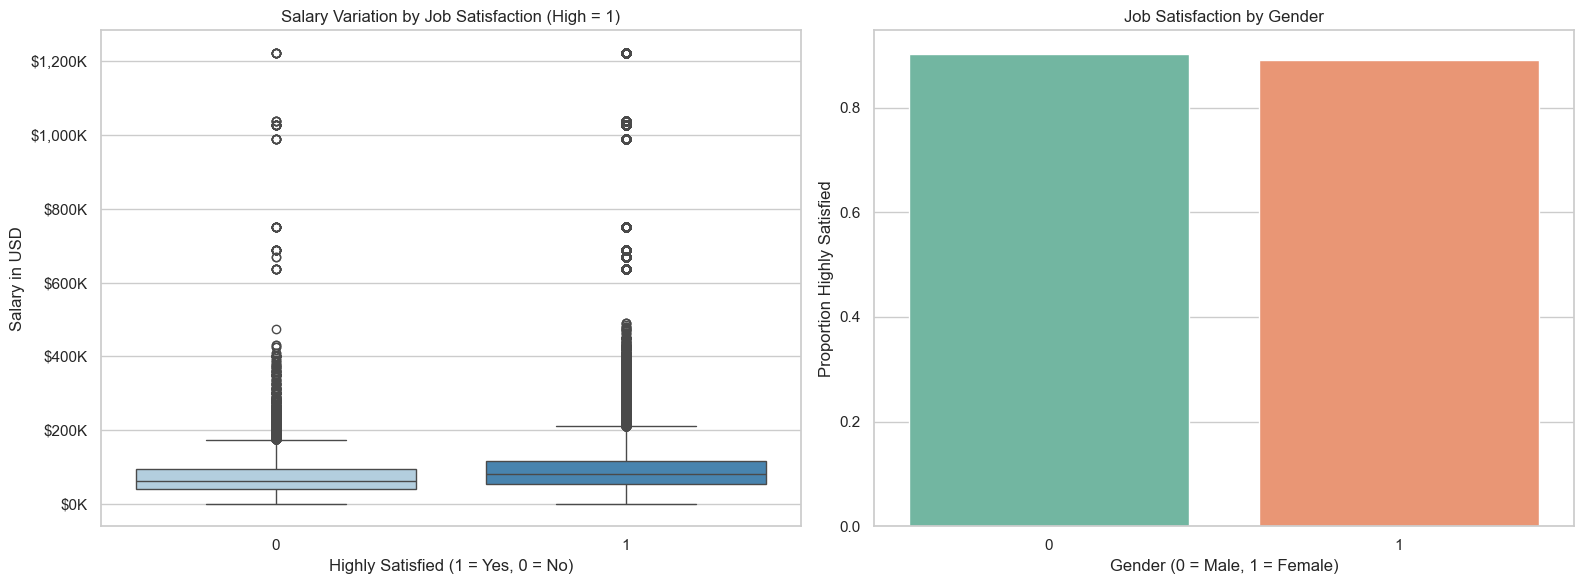

In [403]:
sns.set_theme(style="whitegrid")

# Create the figure for two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Salary variation by job satisfaction (binary)
sns.boxplot(x='high_jobsat', y='salary', data=final_eda, ax=axs[0], palette='Blues')
axs[0].set_title('Salary Variation by Job Satisfaction (High = 1)')
axs[0].set_xlabel('Highly Satisfied (1 = Yes, 0 = No)')
axs[0].set_ylabel('Salary in USD')

# Adjust y-axis to display salary in thousands
axs[0].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x/1000:,.0f}K'))

# Plot 2: Job satisfaction by gender (using the recoded binary variable)
sns.barplot(x='female', y='high_jobsat', data=final_eda, ci=None, palette='Set2', ax=axs[1])
axs[1].set_title('Job Satisfaction by Gender')
axs[1].set_xlabel('Gender (0 = Male, 1 = Female)')
axs[1].set_ylabel('Proportion Highly Satisfied')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


Salary Variation by Job Satisfaction:

The boxplot shows that individuals who are highly satisfied with their job (coded as 1) have a slightly higher median salary compared to those who are not highly satisfied (coded as 0). Highly Satisfied individuals also have a higher upper quartile for salary compared to individuals who are not satisfied with their job.

We can also see that males and females have similar views towards job satisfaction, with females rating themselves slightly lower in terms of job satisfaction across all survey years in the dataset.

**How does salary and job satisfaction vary by geographical location of our respondents? Does this change over time?**


Reminding ourselves of the value counts fo respondent location:

In [404]:
final_eda['respondent_region'].value_counts()

respondent_region
Pacific               60270
South Atlantic        53916
East North Central    43376
Middle Atlantic       41778
West South Central    25956
West North Central    20814
Mountain              18865
New England           18112
East South Central    10239
U.S. Territory         1726
Other                   196
Europe                   54
North America            10
United Kingdom            6
China                     5
Name: count, dtype: int64

It looks like it would be helpful to aggregate these further, given very low value counts outside of the US:

In [405]:
# Get the value counts of the 'respondent_region' column
region_counts = final_eda['respondent_region'].value_counts()

# Identify regions with less than 200 counts
regions_to_replace = region_counts[region_counts < 200].index

# Replace these regions with 'Other'
final_eda['respondent_region'] = final_eda['respondent_region'].replace(regions_to_replace, 'Other')

# Check the updated counts to confirm
final_eda['respondent_region'].value_counts()


respondent_region
Pacific               60270
South Atlantic        53916
East North Central    43376
Middle Atlantic       41778
West South Central    25956
West North Central    20814
Mountain              18865
New England           18112
East South Central    10239
U.S. Territory         1726
Other                   271
Name: count, dtype: int64

Now we're ready to explore the geographical data further:

First, focusing on calculating mean salaries grouped by survey_respondent region:

In [406]:
mean_salary_by_region = final_eda.groupby('respondent_region')['salary'].mean().reset_index()

In [407]:
mean_salary_by_region

,respondent_region,salary
0,East North Central,"85,955"
1,East South Central,"78,474"
2,Middle Atlantic,"97,867"
3,Mountain,"83,949"
4,New England,"97,338"
5,Other,"91,875"
6,Pacific,"104,942"
7,South Atlantic,"92,143"
8,U.S. Territory,"48,850"
9,West North Central,"79,862"


Loading US states geometry data - we can download shapehile data on US states from the NaturalEarth data website (https://www.naturalearthdata.com/downloads/110m-cultural-vectors/)

In [408]:
import geopandas as gpd

shapefile_path = '/Users/niveditaprasad/Desktop/capstone_template/data/ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp'
us_states = gpd.read_file(shapefile_path)

# Filter for only US states
us_states = us_states[us_states['admin'] == 'United States of America']


Use official Census mapping of regions to states: https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf

In [409]:
# Define the manual mapping of U.S. states to regions
region_to_states = {
    'Pacific': ['California', 'Oregon', 'Washington', 'Alaska', 'Hawaii'],
    'South Atlantic': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia', 'District of Columbia'],
    'East North Central': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin'],
    'Middle Atlantic': ['New Jersey', 'New York', 'Pennsylvania'],
    'West South Central': ['Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
    'West North Central': ['Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'Mountain': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming'],
    'New England': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont'],
    'East South Central': ['Alabama', 'Kentucky', 'Mississippi', 'Tennessee'],
    'U.S. Territory': ['Puerto Rico', 'Guam', 'Northern Mariana Islands', 'American Samoa', 'U.S. Virgin Islands']
}

# Reverse the dictionary to map each state to its region
state_to_region = {state: region for region, states in region_to_states.items() for state in states}


In [410]:
# Create a new column in the GeoDataFrame to assign each state to its region
us_states['region'] = us_states['name'].map(state_to_region)

# Merge the region data with the US states GeoDataFrame
merged = us_states.merge(mean_salary_by_region, left_on='region', right_on='respondent_region', how='left')

# Aggregate states into regions using dissolve - in geopd you can basically aggregate geometries into larger regions
regions_gdf = merged.dissolve(by='region', aggfunc={'salary': 'median', 'region': 'first'})

In [411]:
import folium  # Import the folium library to create interactive maps

# Convert the dissolved regions GeoDataFrame into a GeoJSON format
# Folium uses GeoJSON to create geographic visualizations, and we need to convert our GeoDataFrame
# epsg is about the projection of the map
regions_geojson = regions_gdf.to_crs(epsg=4326).to_json()

# Create a base map centered on the US with folium.Map()
# The location parameter is the latitude and longitude for the center of the map.
map = folium.Map(location=[37.8, -96], zoom_start=4)

# Add a choropleth layer to the map
folium.Choropleth(
    geo_data=regions_geojson,  # The GeoJSON data with dissolved regions
    name='choropleth',  # Name of this layer
    data=mean_salary_by_region,  # Your DataFrame that contains the region and count data
    columns=['respondent_region', 'salary'], 
    key_on='feature.id',  # Use the 'id' from the GeoJSON features as the key to match with region names
    fill_color='OrRd',  # Color scheme for the map (Oranges to Reds); you can change this to different color scales
    fill_opacity=0.7,  # Transparency level of the shaded regions (0 = fully transparent, 1 = fully opaque)
    line_opacity=0.2,  # Transparency of the boundary lines between regions
    legend_name='Mean Salary by Region (USD)'  # Title for the legend that shows what the color scale represents
).add_to(map)  # Add this choropleth layer to the map object

# Add hover tooltips to display region and median salary on hover
folium.GeoJson(
    regions_geojson,  # The GeoJSON data
    style_function=lambda feature: {
        'fillColor': '#ffffff',  # Default fill color for hover
        'color': 'black',  # Border color for hover
        'weight': 0.5  # Border thickness for hover
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['region', 'salary'],  # Fields to display in the tooltip
        aliases=['Region: ', 'Mean Salary: $'],  # Labels for the fields
        localize=True  # Automatically formats numbers
    )
).add_to(map)

folium.LayerControl().add_to(map)

In [412]:
map

# Key insights

### We see higher mean salaries over in the Pacific and New England. This seems sensible, given the type of occupations we know our respondents hold in tech, and the higher salaries in these larger cities or tech hubs. As we move forward, it'll be interesting to understand how this might be a predictor of job satisfaction, as we build our models

### For example, given that we see salary varies by the respondent's location, we might hypothesise that so would the likelihood of an individual being highly satisfied in their job. Conversely, if we don't see a relationship, we will want to better explore other components of job satisfaction that may be more important than an individual's salary.


## (c) Other key variables of interest

**How do people rate their  job’s importance to society and degree relevance?**


In [413]:
final_eda['job_degree_relation'].value_counts()

job_degree_relation
4    181316
3     73796
2     40211
Name: count, dtype: int64

We need to recode the above so that we just have 3,2,1 with 3 meaning closely related.

In [414]:
# Recode job_degree_relation to 3, 2, 1
final_eda['job_degree_relation'] = final_eda['job_degree_relation'].replace({4: 3, 3: 2, 2: 1})

Convert some of these to numeric:

In [415]:
final_eda['importance_society_contribution'] = pd.to_numeric(final_eda['importance_society_contribution'])

In [416]:
final_eda['job_degree_relation'] = pd.to_numeric(final_eda['job_degree_relation'])

/var/folders/d8/f47z80nj3835j2cjhqsrtc6r0000gn/T/ipykernel_71592/2698832951.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/d8/f47z80nj3835j2cjhqsrtc6r0000gn/T/ipykernel_71592/2698832951.py:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




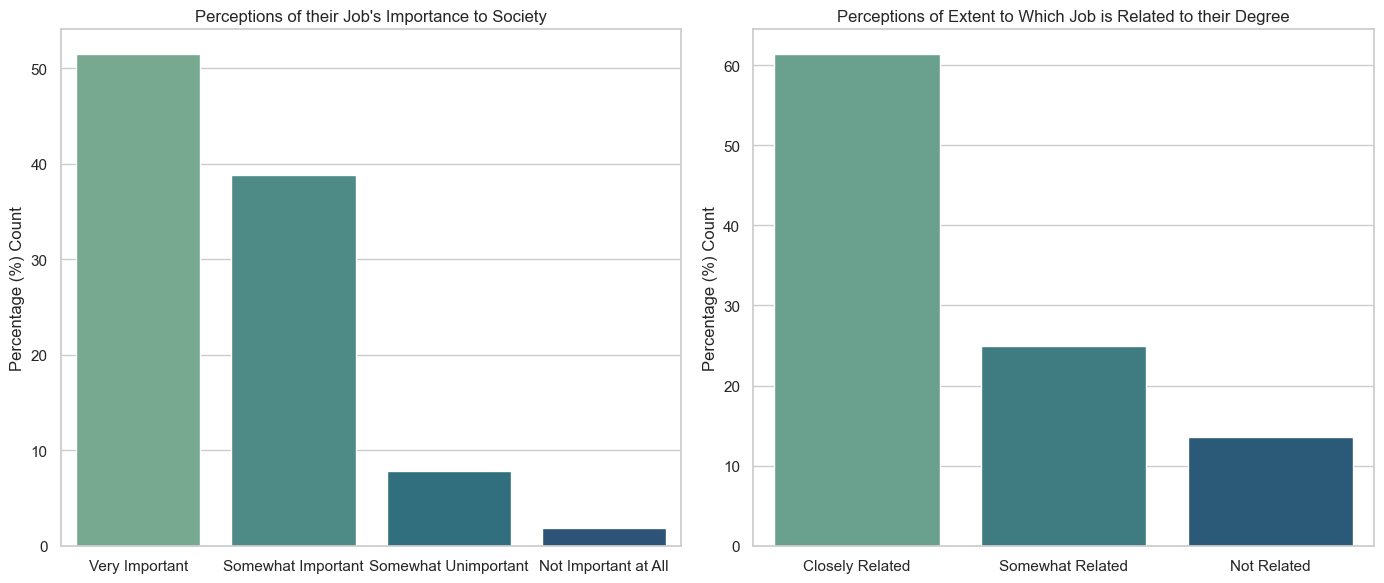

In [417]:
# Set plot theme
sns.set_theme(style="whitegrid")

# Correct mapping for job_degree_relation (best is now 3)
job_degree_labels = {
    3: 'Closely Related',
    2: 'Somewhat Related',
    1: 'Not Related'
}

# Correct mapping for importance_society_contribution (set order explicitly)
importance_society_labels = {
    4: 'Very Important',
    3: 'Somewhat Important',
    2: 'Somewhat Unimportant',
    1: 'Not Important at All'
}

# Calculate normalized value counts for both variables
importance_society_counts = final_eda['importance_society_contribution'].map(importance_society_labels).value_counts(normalize=True).mul(100)
job_degree_counts = final_eda['job_degree_relation'].map(job_degree_labels).value_counts(normalize=True).mul(100)

# Create figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Importance of job to society (ordered correctly)
sns.barplot(
    x=importance_society_counts.index,
    y=importance_society_counts.values,
    palette='crest',  # Use 'crest' from friendly_colors scheme
    ax=axs[0]
)
axs[0].set_title("Perceptions of their Job's Importance to Society")
axs[0].set_xlabel('')
axs[0].set_ylabel('Percentage (%) Count')

# Plot 2: Relation of job to degree (ensure all categories are shown)
sns.barplot(
    x=job_degree_counts.index,
    y=job_degree_counts.values,
    palette='crest',  # Use 'crest' from friendly_colors scheme
    ax=axs[1]
)
axs[1].set_title("Perceptions of Extent to Which Job is Related to their Degree")
axs[1].set_xlabel('')
axs[1].set_ylabel('Percentage (%) Count')

# Adjust the layout for readability
plt.tight_layout()

# Show the plots
plt.show()

Overall, people across survey years consider their job to be 'very important' to society, and believe their degree is aligned with their current occupation. This will be interesting to explore further in terms of how this might predict overall job satisfaction, and how this interacts with other key feature variables.

**What's the role of work experience in all of this?**


In our dataset, we also have features relating to when the indiviudal started their principal job, as well as proxies for employment duration. It's worth exploring how we could go about combining this into a more meanignful feature.

In [418]:
# List of columns to check
columns_of_interest = [
    'last_worked_month', 'last_worked_year', 'start_year_current_job',
    'academic_year_most_recent_degree'
]

# Use .dtypes to find the data types of the selected columns
print(final_eda[columns_of_interest].dtypes)

last_worked_month                   float64
last_worked_year                    float64
start_year_current_job              float64
academic_year_most_recent_degree    float64
dtype: object


We can follow a number of steps to convert this into something more meanignful, with a few assumptions given the data constraints:

1. If the job started in the same year as the survey, assign a duration of 6 months.
2. If the job started before the survey year, calculate the job duration in months based on the difference in years.

In [419]:
# Convert 'start_year_current_job' to a datetime format (assuming the job started in January of that year)
final_eda['start_date'] = pd.to_datetime(final_eda['start_year_current_job'], format='%Y', errors='coerce') + pd.DateOffset(months=0)

# Convert 'survey_year' to a datetime format (assuming the survey happened in February of the survey year)
final_eda['survey_date'] = pd.to_datetime(final_eda['survey_year'], format='%Y', errors='coerce') + pd.DateOffset(months=1)

In [420]:
# Create a new column for job duration in months
def calculate_job_duration(row):
    # If start date or survey date is missing, return NaN
    if pd.isnull(row['start_date']) or pd.isnull(row['survey_date']):
        return None
    # Calculate the difference in months between survey date (Feb) and start date (Jan)
    return (row['survey_date'].year - row['start_date'].year) * 12 + (row['survey_date'].month - row['start_date'].month)

# Apply the function to calculate job duration in months
final_eda['job_duration_months'] = final_eda.apply(calculate_job_duration, axis=1)

Summarising the approach below:

| **Approach**                      | **Why We Went With This**                                                                                      | **What It Tells Us**                                           | **What It Doesn't Tell Us**                                   |
|------------------------------------|----------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------|---------------------------------------------------------------|
| **Job Tenure (Years in Current Job)** | We focused on job tenure because it is the most reliable indicator available based on the clean and complete data. It avoids the complexities of calculating total career duration and employment gaps using incomplete data like `last_worked_year` and `last_worked_month`. | Tells us how long a person has been continuously employed in their current job, providing insight into job stability and tenure length. | Doesn't capture total career experience, multiple job changes, or gaps between jobs. It also doesn't reflect the overall length of the person's career or past job experiences. |
| **Other Features (e.g., Last Worked, Career Gaps)** | These features were harder to calculate accurately due to missing values and imprecise data (e.g., missing `last_worked_month`, potential gaps in employment). | Could give a more holistic view of employment history if the data were complete. | Unreliable due to missing or incomplete data, leading to inaccurate or misleading conclusions about overall work experience or career gaps. |


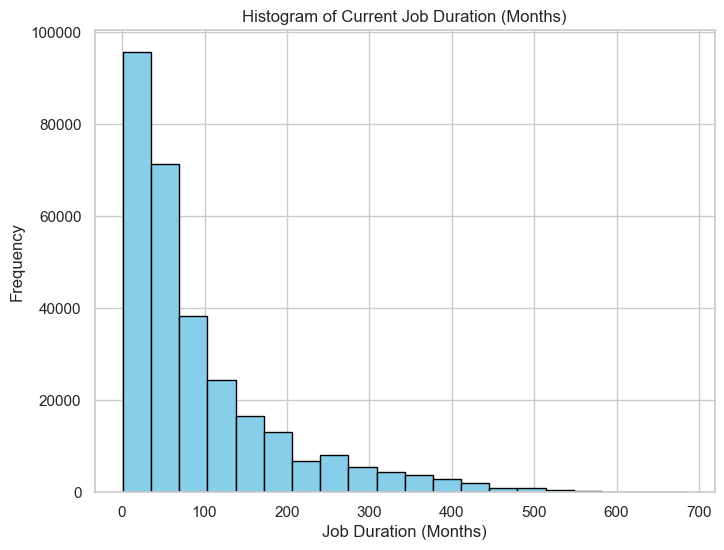

In [421]:
# Plot a histogram of 'job_duration_years'
plt.figure(figsize=(8, 6))
plt.hist(final_eda['job_duration_months'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Current Job Duration (Months)')
plt.xlabel('Job Duration (Months)')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()


### We can see that this column is heavily right-skewed, with individuals' job tenure (linked to their current principal job at time of survey) is usually between the 0-80 month mark.

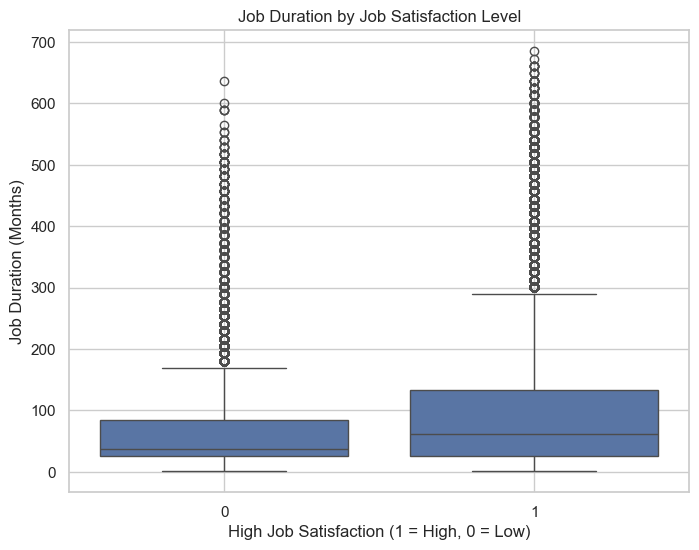

In [426]:
# Boxplot to compare job duration for binary job satisfaction
plt.figure(figsize=(8, 6))
sns.boxplot(x='high_jobsat', y='job_duration_months', data=final_eda)
plt.title('Job Duration by Job Satisfaction Level')
plt.xlabel('High Job Satisfaction (1 = High, 0 = Low)')
plt.ylabel('Job Duration (Months)')
plt.grid(True)
plt.show()

### And now when we look at the distribution of job duration in months, for people who were 'highly satisfied' with their jobs, we can see individuals with more experience tend to fall within the highly satisfied category - this makes sense in practice given the learning curve jobs are often associated with.

### We are now ready to review and drop any remaining redundant columns:

In [427]:
final_eda.columns

Index(['job_satisfaction', 'satisfaction_salary', 'satisfaction_advancement',
       'satisfaction_benefits', 'satisfaction_challenges',
       'satisfaction_location', 'satisfaction_security', 'salary',
       'importance_society_contribution', 'job_degree_relation',
       'recent_degree_field', 'recent_degree_type',
       'academic_year_most_recent_degree', 'age', 'marital_status',
       'citizenship_status', 'children_in_household', 'active_certifications',
       'last_worked_month', 'last_worked_year', 'start_year_current_job',
       'survey_year', 'occupation_name', 'female', 'business_for_profit',
       'employer_sector', 'employer_size_category', 'employer_region',
       'respondent_region', 'ethnicity', 'high_jobsat', 'start_date',
       'survey_date', 'job_duration_months', 'job_duration_category'],
      dtype='object')

In [433]:
# Drop unnecessary columns
# final_eda.drop(columns=['last_worked_month', 'job_satisfaction', 'last_worked_year', 'start_year_current_job', 'academic_year_most_recent_degree', 'start_date'], inplace=True)
# final_eda.drop(columns=['business_for_profit'], inplace=True)
final_eda.drop(columns=['job_duration_category'], inplace=True)

We also need to ensure the active certifications variable is recoded appropriartely:

In [441]:
# Recode 'active_certifications' to set 98 as 0
final_eda['active_certifications'] = final_eda['active_certifications'].replace(98, 0)

# Ensure 'active_certifications' is numeric
final_eda['active_certifications'] = pd.to_numeric(final_eda['active_certifications'], errors='coerce')

# Verify the changes
print(final_eda['active_certifications'].value_counts())


active_certifications
0     185918
1      60256
2      28022
3      11469
4       4411
5       2334
6       1055
7        458
8        399
10       251
20       238
9        130
12        89
15        74
11        73
13        36
14        32
16        26
18        20
17        17
19        15
Name: count, dtype: int64


Doing the same for `citizenship_status' to make this more interpretable a s a US citizen binary indicator:

In [446]:
# Recode 'citizenship_status' to 'us_citizen' where 'Y' is 1, otherwise 0
final_eda['us_citizen'] = final_eda['citizenship_status'].apply(lambda x: 1 if x == 'Y' else 0)

And doing the same as an indicator of whether the individual has children living in their household:

In [447]:
# Recode 'children_in_household' where 'Y' is 1, otherwise 0
final_eda['children_in_household'] = final_eda['children_in_household'].apply(lambda x: 1 if x == 'Y' else 0)


Double checking we didn't create any new missings:

In [448]:
final_eda.isna().sum()

satisfaction_salary                0
satisfaction_advancement           0
satisfaction_benefits              0
satisfaction_challenges            0
satisfaction_location              0
satisfaction_security              0
salary                             0
importance_society_contribution    0
job_degree_relation                0
recent_degree_field                0
recent_degree_type                 0
age                                0
marital_status                     0
citizenship_status                 0
children_in_household              0
active_certifications              0
survey_year                        0
occupation_name                    0
female                             0
employer_sector                    0
employer_size_category             0
employer_region                    0
respondent_region                  0
ethnicity                          0
high_jobsat                        0
survey_date                        0
job_duration_months                0
u

In [449]:
final_eda.dtypes

satisfaction_salary                         int64
satisfaction_advancement                    int64
satisfaction_benefits                       int64
satisfaction_challenges                     int64
satisfaction_location                       int64
satisfaction_security                       int64
salary                                    float64
importance_society_contribution             int64
job_degree_relation                         int64
recent_degree_field                        object
recent_degree_type                         object
age                                       float64
marital_status                             object
citizenship_status                         object
children_in_household                       int64
active_certifications                     float64
survey_year                        datetime64[ns]
occupation_name                            object
female                                      int64
employer_sector                            object


# 4. Basic Statistical Analysis

Now that we have our target variable, and have done an in-depth exploration of our different features, we can explore the statistical significance of the relationships we explroed earlier.

These include assessing the statistical significance of the association between:

1. Salary and job satisfaction
2. Age, gender, ethnicity and job satisfaction
3. Job tenure and job satisfaction

We can also explore initial correlations between our feature variables.

### Correlations and statistical significance

For the correlation analysis, the following hypotheses are typically tested:

* Null Hypothesis (H₀: ρ = 0)
There is no significant relationship between the variables in the correlation matrix. 

* Alternative Hypothesis (H₁: ρ ≠ 0)
There is some relationship between the variables in the correlation matrix. 

For now, we will focus only on our numeric variables, and explore all features as part of our stats model.

In [435]:
#Import necessary libraries
from scipy.stats import pearsonr
import plotly.express as px
import plotly.graph_objects as go

In [450]:
# Create a deepcopy for corr_eda
corr_eda = final_eda.copy()

# Select only numeric columns for correlation matrix
numeric_cols = corr_eda.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = corr_eda[numeric_cols].corr()

# Calculate p-values for the correlations
p_values = pd.DataFrame({
    col: [pearsonr(corr_eda[col], corr_eda[other_col])[1] for other_col in corr_matrix.columns]
    for col in corr_matrix.columns
}, index=corr_matrix.columns)

# Create a threshold for significant correlations (p-value < 0.05)
significant = p_values < 0.05

# Exclude non-significant correlations by setting them to NaN
filtered_corr_matrix = corr_matrix.where(significant)

# Create custom hover text with correlation coefficient and variable names
hover_text = corr_matrix.applymap(lambda x: f'Corr: {x:.2f}')
for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        if significant.loc[i, j]:  # Only include significant p-values
            p_value = p_values.loc[i, j]
            hover_text.loc[i, j] += f'*<br>P-value: {p_value:.2g}<br>Vars: {i} - {j}'
        else:
            hover_text.loc[i, j] = ''  # Remove text for non-significant correlations

# Create an interactive heatmap with Plotly
fig = go.Figure(data=go.Heatmap(
    z=filtered_corr_matrix.values,
    x=filtered_corr_matrix.columns,
    y=filtered_corr_matrix.index,
    text=hover_text.values,
    hoverinfo='text',
    colorscale='RdBu_r',  
    zmin=-1,  # Set minimum value for color scale
    zmax=1,   # Set maximum value for color scale
    showscale=True
))

# Add titles and labels
fig.update_layout(
    title='Correlation Matrix with Significant Correlations Highlighted',
    xaxis_title='Variables',
    yaxis_title='Variables',
    width=800,
    height=800
)

# Show the interactive heatmap
fig.show()

/var/folders/d8/f47z80nj3835j2cjhqsrtc6r0000gn/T/ipykernel_71592/1531126588.py:21: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



# Honing in on correlation with our target variable:

1. We see statistically significant correlations (p-value of < 0.05) between the likelihood of someone being highly satisfied with their job, and whether they rated their satisfaction with salary highly.

2. This is even stronger for individuals who are pleased with their opportunities for career advancement - this is associated with being highly satisfied (a corr coefficient of 0.43)

3. At the same time we can note that some components of job satisfaction are highlt correlated, suggetsing collinearity that we would want to address in our modelling

4. We see a positive correlation between an individual who has pursued active certifications with whether they are highly satisfied

5. Being female is associated with being less satisfied with their job.

6. An interesting relationship to note is the moderate correlation between perceptions of whether one's degree was relevant to their job, and higher satisfaction with the intellectual challenge provided by their job, suggesting an additional feature that could explain this - the nature of the degree field studied by the individual.

# 5. Summary

Based on what we've learned throughout this notebook, here are some key hypotheses, feature variables of interest, and next steps for constructing my base model notebook related to predicting whether an individual is "highly satisfied" with their job:

1. Key Hypotheses:

* Job Duration Hypothesis: Longer job duration (in months or years) is positively associated with higher job satisfaction. Those who have been in their jobs longer are more likely to be highly satisfied.

* Salary Hypothesis: Higher salaries are associated with higher job satisfaction. Individuals with higher salaries are more likely to report being highly satisfied.

* Work Benefits and Security Hypothesis: Factors like job benefits, advancement opportunities, and job security contribute to higher satisfaction. Individuals who report satisfaction in these areas are more likely to be highly satisfied overall.

* Job-Related Contribution Hypothesis: Individuals who feel their job contributes to society or is aligned with their degree may experience higher job satisfaction.

* Employer Characteristics Hypothesis: Employer sector (e.g., public, private) and size might influence job satisfaction. For instance, larger employers might provide more job security or benefits that could increase satisfaction.

* Personal and Demographic Factors Hypothesis: Variables like age, marital status, gender, and certifications may influence job satisfaction. For example, having certifications or more life stability (marital status, children) may be linked to higher satisfaction.

Key Feature Variables of Interest:

Job Duration `job_duration_months`: Measuring the length of time in the current job.

Salary `salary`: The individual's salary level.

Job Benefits `satisfaction_benefits`: Satisfaction with benefits.

Advancement Opportunities `satisfaction_advancement`: Satisfaction with job advancement opportunities.

Job Security `satisfaction_security`: Perception of job security.

Societal Contribution `importance_society_contribution`: How important the individual perceives their job's contribution to society.

Job-Degree Relation `job_degree_relation`: Whether the job aligns with the individual's degree.

Employer Sector `employer_sector`: Type of employer.

Employer Size `employer_size_category`: Size of the employer.

Certifications `active_certifications`: The number of active certifications.

Demographic Factors: `Age`, `marital status`, `female`, and `children_in_household`.

# Next Steps for constructing base model

* Ensure all key features are ready for model input (e.g.,one hot encoding categorical variables like employer_sector, handling missing data, scaling salary).
* Starting with a logistic regression model, as your target variable (high_jobsat) is binary, built using statsmodel and forward/backward selection
* Exploring coefficients and odds ratio, and evaluating baseline model performance using metrics like accuracy, precision, recall, and F1 score to set a benchmark.
* Develop advanced modelling roadmap


********

### Saving latest copy of our `final_eda`

In [ ]:
import os

# Define the directory and file name relative to your current working directory
directory = '/Users/niveditaprasad/Desktop/capstone_template/data_for_EDA'
file_path = os.path.join(directory, 'final_eda.csv')

# Create the new directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Export my cleaned df as csv
final_eda.to_csv(file_path, index=False)

print(f"Dataset saved to {file_path}")


Dataset saved to /Users/niveditaprasad/Desktop/capstone_template/data_for_EDA/final_eda.csv


### Export of interesting plotly graph:

In [453]:
# Save as an interactive HTML file
map.save("/Users/niveditaprasad/Desktop/capstone_template/visualisations/map.html")